# Introduction

This notebook contains a solution for the [Guided Project: Building A Handwritten Digits Classifier](https://www.dataquest.io/course/deep-learning-fundamentals/).

It encompasses the K-Nearest Neighbors and Multi-Layer Perceptron models.

# Imports

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits # import load_digits()
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier

# Loading data

In [98]:
data_dictionary = load_digits()

# Transform the NumPy 2D array into a pandas dataframe
pd_data = pd.DataFrame(data = data_dictionary['data'].copy())

In [99]:
data_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [100]:
for key in data_dictionary.keys():
    print(type(data_dictionary[key]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'NoneType'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'str'>


In [101]:
labels = pd.Series(data_dictionary['target'])
data = pd.DataFrame(data_dictionary['data'])

# Plotting

In [102]:
data_dictionary['target'][100]

4

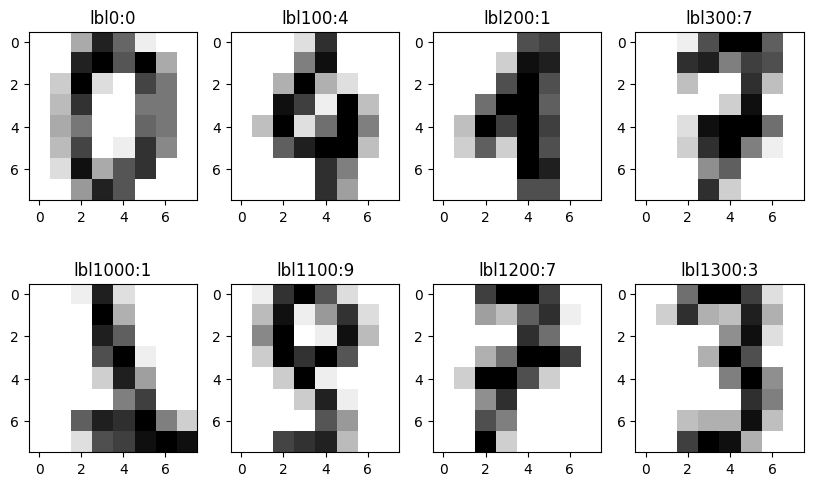

In [103]:
rows_to_plot = np.array([[0,100,200,300],
                         [1000,1100,1200,1300]])

fig, ax = plt.subplots(2, 4, figsize = (10, 6))

for row in range(0,rows_to_plot.shape[0]):
    for col in range(0,rows_to_plot.shape[1]):
        img_number = rows_to_plot[row][col]
        img_data = data_dictionary.data[img_number]
        img = np.reshape(img_data,(8,8))
        ax[row][col].imshow(img, cmap = 'gray_r')
        ax[row][col].set_title(f'lbl{img_number}:{data_dictionary["target"][img_number]}')

# KNN model

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [105]:
def train_knn(X: pd.DataFrame, y:pd.DataFrame, k: int = 5):
    knn = KNN(n_neighbors=k)
    knn.fit(X,y)
    return knn

def test(model,X_t: pd.DataFrame, y_t: pd.DataFrame, report=False):
    preds = model.predict(X_t)
    model_acc = accuracy_score(y_t, preds) 
    if report:
        report = classification_report(y_t, preds)
        print(report)
    return model_acc

def cross_validate(X: pd.DataFrame, y: pd.DataFrame, folds:int = 4, neighbors:int=5):
    kf = KFold(n_splits=folds,random_state=2, shuffle=True)
    acc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        #print(f'X_train.shape= {X_train.shape} | X_test.shape = {X_test.shape} \n y_train.shape = {y_train.shape} | y_test.shape = {y_test.shape}')
        knn_model = train_knn(X_train,y_train,neighbors)
        acc.append(test(knn_model,X_test,y_test))
    return acc

In [106]:
accuracies = cross_validate(data,labels)
np.mean(accuracies)

0.9849777282850779

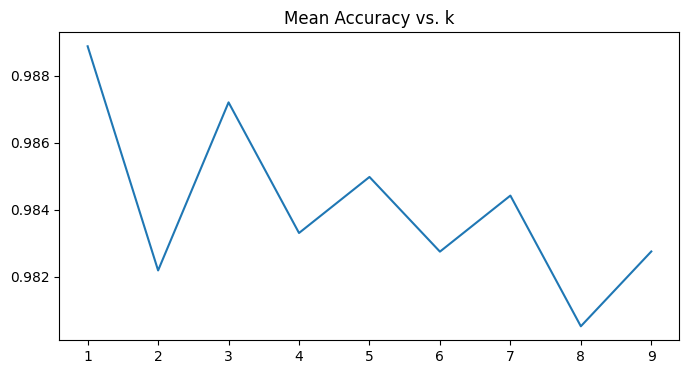

In [107]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(data,labels,4,k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

# Neural Nets

## Single Hidden Layer

In [109]:
def train_nn(X_train: pd.DataFrame, y_train: pd.DataFrame, hidden_neurons: tuple = (4,)):
    mlp_classifier = MLPClassifier(hidden_layer_sizes= hidden_neurons)
    mlp_classifier.fit(X_train, y_train)
    return mlp_classifier

def test_nn(mlp_model, X_t: pd.DataFrame, y_t: pd.DataFrame, report=False):
    preds = mlp_model.predict(X_t)
    model_acc = accuracy_score(y_t, preds) 
    if report:
        report = classification_report(y_t, preds)
        print(report)
    return model_acc

def cross_validate_nn(X: pd.DataFrame, y: pd.DataFrame, folds:int = 4, hidden_neurons:int=5):
    kf = KFold(n_splits=folds,random_state=2, shuffle=True)
    acc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        #print(f'X_train.shape= {X_train.shape} | X_test.shape = {X_test.shape} \n y_train.shape = {y_train.shape} | y_test.shape = {y_test.shape}')
        nn_model = train_nn(X_train,y_train,hidden_neurons)
        acc.append(test(nn_model,X_test,y_test))
    return acc
    

/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

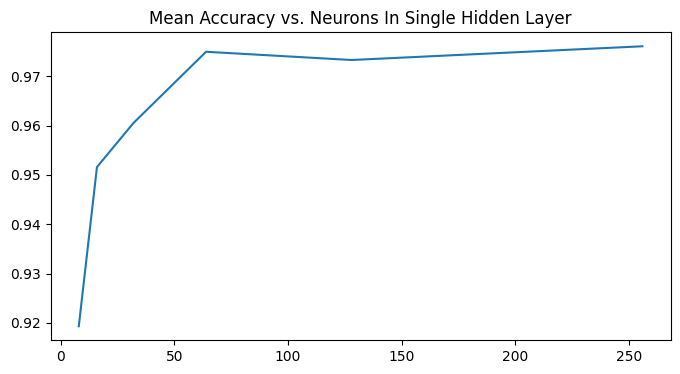

In [110]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate_nn(data,labels,4,n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)


## Two Hidden Layers

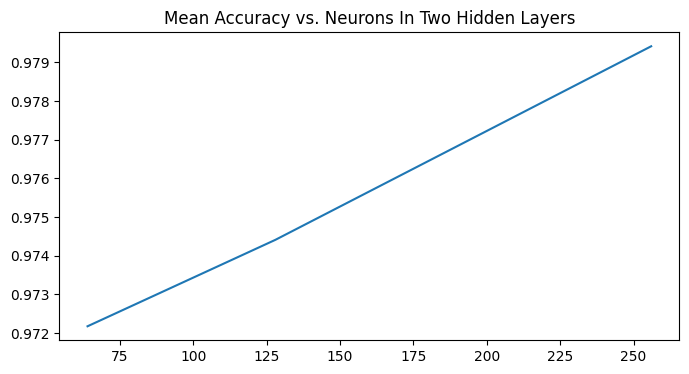

In [112]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate_nn(data,labels,4,n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)


## Three Hidden Layers

/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mateus/Documentos/embedded.ai.mtxslv/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

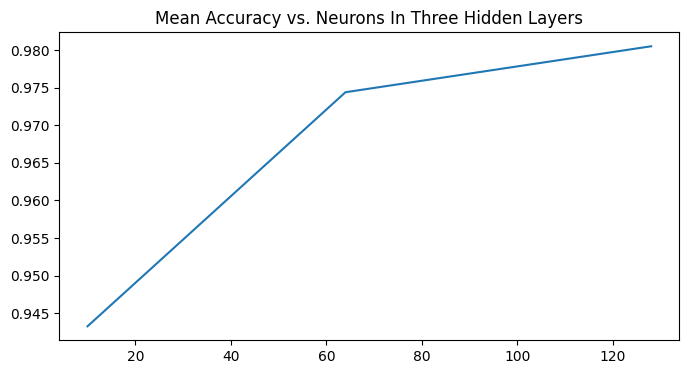

In [113]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_nn(data,labels,6,n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)
